<a href="https://colab.research.google.com/github/randifajar/Data-Wrangling-and-SQL/blob/main/data_wrangling_and_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [6]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Menyalin Database dari Google Drive

In [7]:
# membuat koneksi dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# menyalin database
%cp '/content/drive/MyDrive/Pacmann/SQL and Data Wrangling/olist.db' '/content/olist.db'

# Membuat Koneksi dengan Database

In [9]:
conn = sqlite3.connect('olist.db')

# Melihat Daftar Tabel dan Mengaksesnya

In [10]:
# mengakses daftar tabel
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [ ]:
# 1. mengakses data customers
customers = pd.read_sql("SELECT * FROM olist_order_customer_dataset;", conn)
customers

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
# 2. mengakses data geolocation
geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset;", conn)
geolocation

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
# 3. mengakses data order items
order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset;", conn)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# 4. mengakses data order payments
order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset;", conn)
order_payments

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
# 5. mengakses data order reviews
order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset;", conn)
order_reviews

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [11]:
# 6. mengakses data order
order = pd.read_sql("SELECT * FROM olist_order_dataset;", conn)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
# 7. mengakses data products
products = pd.read_sql("SELECT * FROM olist_products_dataset;", conn)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# 8. mengakses data sellers
sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset;", conn)
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# 9. mengakses data category name translation
category_name_translation = pd.read_sql("SELECT * FROM product_category_name_translation;", conn)
category_name_translation

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Data Processing and Cleaning

## 1. Customers Table

### 1.1 Menghapus kolom index

In [8]:
# menghapus kolom index
customers = customers.drop(["index"], axis=1)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### 1.2 Cek dan ubah tipe data kolom

In [9]:
# info dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
# mengubah tipe data pada kolom customer_zip_code_prefix
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype("object")
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### 1.3 Cek dan mengatasi missing values

In [11]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = customers.isna().sum().sort_values(ascending = False)
nan_col

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### 1.4 Cek dan mengatasi data duplikat

In [12]:
# cek jika terdapat data duplikat
customers[customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### 1.5 Cek dan mengatasi data yang inkonsisten

In [13]:
# cek data unik pada property type
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [14]:
# mengakses data geolocation
k_unique = pd.read_sql("SELECT customer_city, COUNT(customer_city) as jumlah FROM olist_order_customer_dataset GROUP BY customer_city;", conn)
k_unique

,customer_city,jumlah
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


## 2. Geolocation Table

### 2.1 Menghapus kolom index

In [16]:
# mengahapus kolom index
geolocation = geolocation.drop(["index"], axis=1)
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### 2.2 Cek dan ubah tipe data kolom

In [17]:
# info dataset
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
# mengubah tipe data pada kolom geolocation_zip_code_prefix
geolocation["geolocation_zip_code_prefix"] = geolocation["geolocation_zip_code_prefix"].astype("object")
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### 2.3 Cek dan mengatasi missing values

In [19]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = geolocation.isna().sum().sort_values(ascending = False)
nan_col

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### 2.4 Cek dan mengatasi data duplikat

In [20]:
# cek jika terdapat data duplikat
geolocation[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [21]:
# menghapus data duplikat dari kolom
geolocation.drop_duplicates(keep='first',inplace=True, ignore_index=True)
geolocation[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


### 2.5 Cek dan mengatasi data yang inkonsisten

In [22]:
# cek data unik pada property type
geolocation.geolocation_city.unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [23]:
# mengakses data geolocation
k_unique = pd.read_sql("SELECT geolocation_city, geolocation_zip_code_prefix, COUNT(geolocation_city) as jumlah FROM olist_geolocation_dataset GROUP BY geolocation_city;", conn)
k_unique

,geolocation_city,geolocation_zip_code_prefix,jumlah
0,* cidade,81470,1
1,...arraial do cabo,28930,1
2,4o. centenario,87365,1
3,4º centenario,87365,2
4,abadia de goias,75345,8
...,...,...,...
8006,áurea,99835,2
8007,ângulo,86755,4
8008,érico cardoso,46180,1
8009,óbidos,68250,11


In [24]:
# menyeragamkan data
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'cidade gaúcha' if '* cidade' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'arraial do cabo' if '...arraial do cabo' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'quarto centenário' if '4o. centenario' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'quarto centenário' if '4º centenario' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'quarto centenário' if 'quarto centenario' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'abadiânia' if 'abadiania' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'abaeté' if 'abaete' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'abaré' if 'abare' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'abatiá' if 'abatia' in x else x)
geolocation.geolocation_city = geolocation.geolocation_city.apply(lambda x: 'são paulo' if 'sao paulo' in x else x)

In [25]:
# cek data unik pada property type
geolocation.geolocation_city.unique()

array(['são paulo', 'sao bernardo do campo', 'jundiaí', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

## 3. Order Items Table

### 3.1 Menghapus kolom index

In [27]:
# mengahapus kolom index
order_items = order_items.drop(["index"], axis=1)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### 3.2 Cek dan ubah tipe data kolom

In [28]:
# info dataset
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
# mengubah tipe data pada kolom order_item_id dan shipping_limit_date
order_items["order_item_id"] = order_items["order_item_id"].astype("object")
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"], format='%Y/%m/%d %H:%M:%S')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


### 3.3 Cek dan mengatasi missing values

In [30]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = order_items.isna().sum().sort_values(ascending = False)
nan_col

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### 3.4 Cek dan mengatasi data duplikat

In [31]:
# cek jika terdapat data duplikat
order_items[order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### 3.5 Cek dan mengatasi outlier

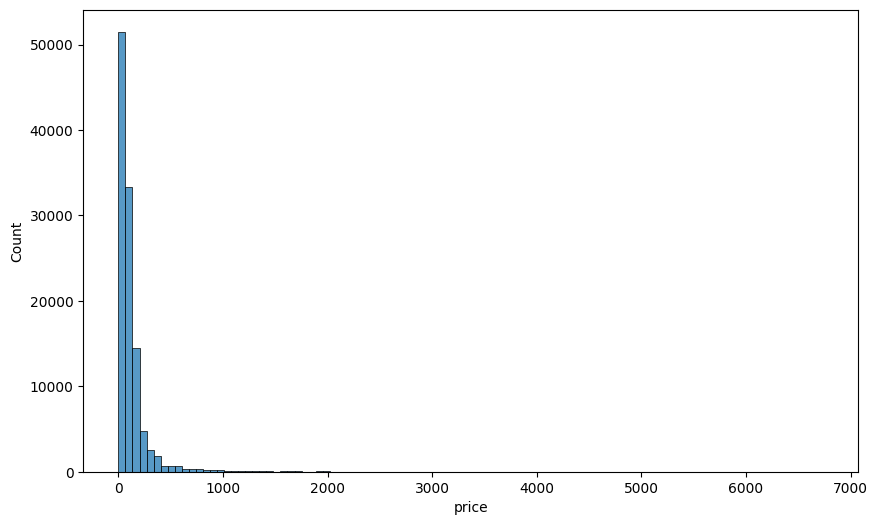

In [32]:
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_items,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

In [33]:
# deskripsi statistik dari kolom price
order_items["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [34]:
# mencari Q1 & Q3
Q1 = order_items.price.quantile(0.25)
Q3 = order_items.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 39.90
Q3 : 134.90


In [35]:
# mencari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 95.00
Maximum Boundary : 277.40


In [36]:
# filter data tanpa outlier
order_items = order_items[order_items["price"] < max_bound]

In [37]:
# validasi hasil filter
order_items["price"].describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

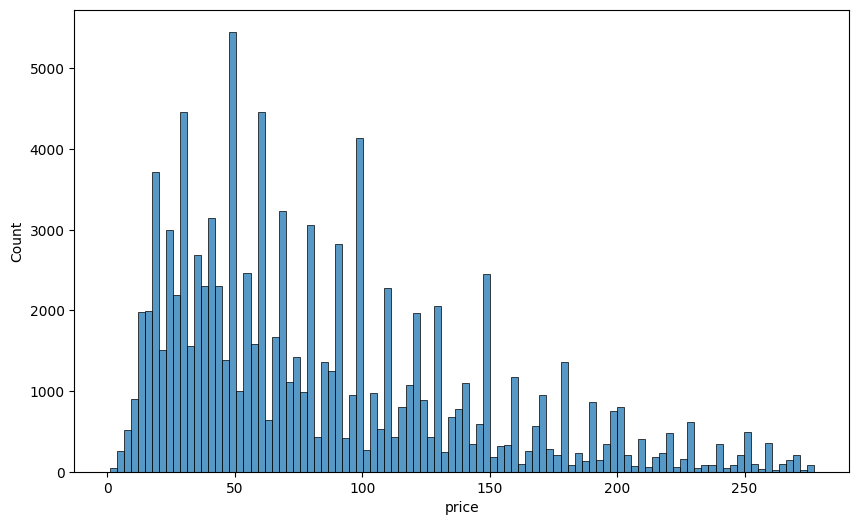

In [38]:
# cek data setelah outlier dihapus
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_items,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

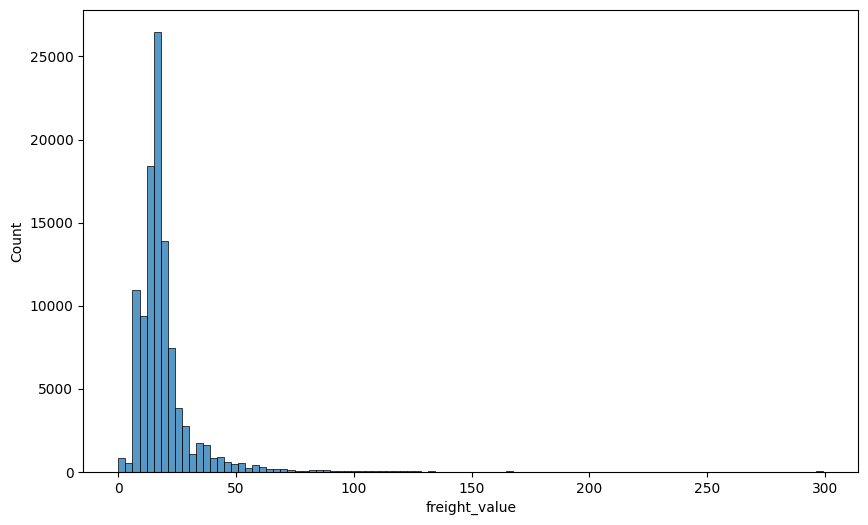

In [39]:
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_items,
             x = "freight_value",
             bins = 100,
             ax = ax)

plt.show()

In [40]:
# mencari Q1 & Q3
Q1 = order_items.freight_value.quantile(0.25)
Q3 = order_items.freight_value.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 12.79
Q3 : 19.84


In [41]:
# mencari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 7.05
Maximum Boundary : 30.41


In [42]:
# filter data tanpa outlier
order_items = order_items[order_items["freight_value"] < max_bound]

In [43]:
# validasi hasil filter
order_items["freight_value"].describe()

count    94667.00000
mean        15.64013
std          5.25916
min          0.00000
25%         12.49000
50%         15.31000
75%         18.34000
max         30.41000
Name: freight_value, dtype: float64

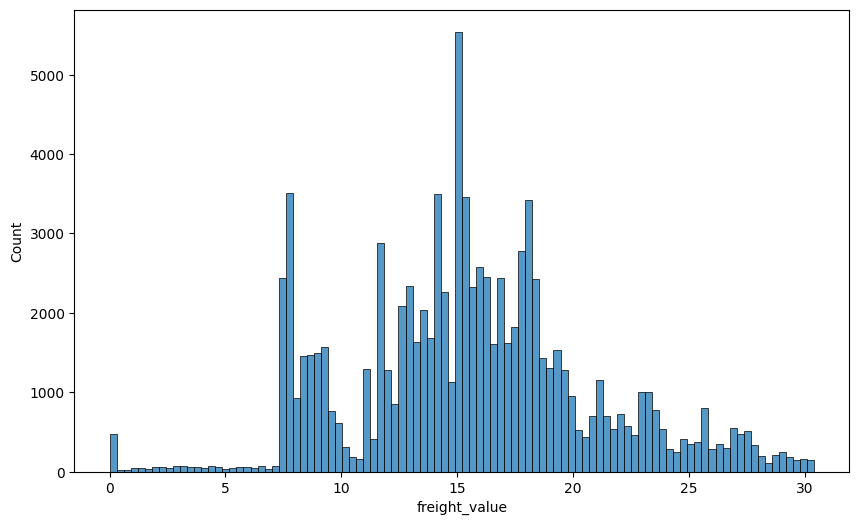

In [44]:
# cek data setelah outlier dihapus
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_items,
             x = "freight_value",
             bins = 100,
             ax = ax)

plt.show()

## 4. Order Payments Table

### 4.1 Menghapus kolom index

In [46]:
# mengahapus kolom index
order_payments = order_payments.drop(["index"], axis=1)
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### 4.2 Cek dan ubah tipe data kolom

In [47]:
# info dataset
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [48]:
# mengubah tipe data pada kolom payment_installments
order_payments["payment_installments"] = order_payments["payment_installments"].astype("object")
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB


### 4.3 Cek dan mengatasi missing values

In [49]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = order_payments.isna().sum().sort_values(ascending = False)
nan_col

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 4.4 Cek dan mengatasi data duplikat

In [50]:
# cek jika terdapat data duplikat
order_payments[order_payments.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### 4.5 Cek dan mengatasi data yang inkonsisten

In [51]:
# cek data unik pada property type
order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [52]:
# mengakses data geolocation
k_unique = pd.read_sql("SELECT payment_type, COUNT(payment_type) as jumlah FROM olist_order_payments_dataset GROUP BY payment_type;", conn)
k_unique

,payment_type,jumlah
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


### 4.6 Cek dan mengatasi outlier

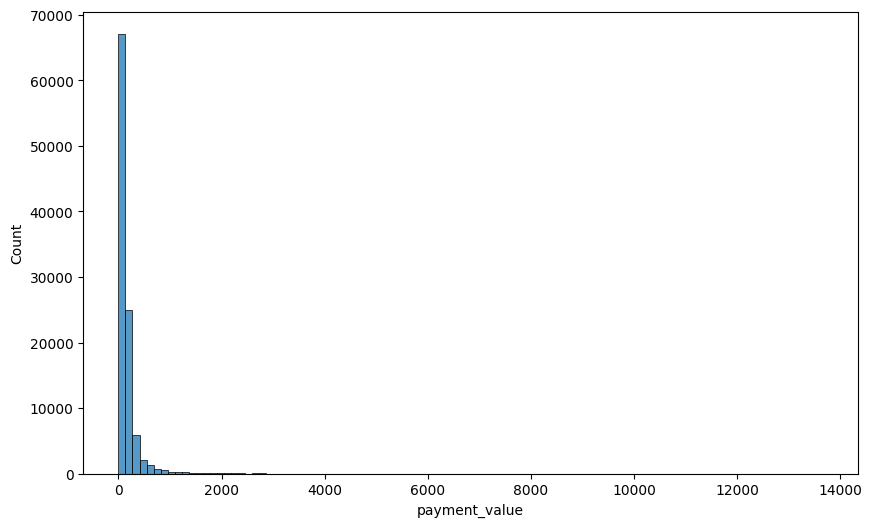

In [53]:
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_payments,
             x = "payment_value",
             bins = 100,
             ax = ax)

plt.show()

In [54]:
# deskripsi statistik dari kolom price
order_payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [55]:
# mencari Q1 & Q3
Q1 = order_payments.payment_value.quantile(0.25)
Q3 = order_payments.payment_value.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 56.79
Q3 : 171.84


In [56]:
# mencari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 115.05
Maximum Boundary : 344.41


In [57]:
# filter data tanpa outlier
order_payments = order_payments[order_payments["payment_value"] < max_bound]

In [58]:
# validasi hasil filter
order_payments["payment_value"].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

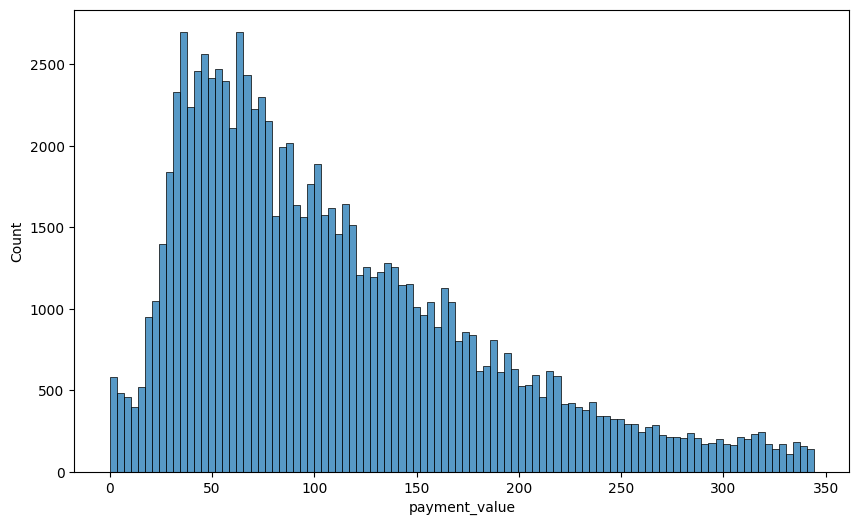

In [59]:
# cek data setelah outlier dihapus
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = order_payments,
             x = "payment_value",
             bins = 100,
             ax = ax)

plt.show()

## 5. Order Reviews Table

### 5.1 Menghapus kolom index

In [61]:
# mengahapus kolom index
order_reviews = order_reviews.drop(["index"], axis=1)
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


### 5.2 Cek dan ubah tipe data kolom

In [62]:
# info dataset
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [63]:
# mengubah tipe data pada kolom review_creation_date dan review_answer_timestamp
order_reviews["review_creation_date"] = pd.to_datetime(order_reviews["review_creation_date"], format='%Y/%m/%d')
order_reviews["review_answer_timestamp"] = pd.to_datetime(order_reviews["review_answer_timestamp"], format='%Y/%m/%d %H:%M:%S')
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### 5.3 Cek dan mengatasi missing values

In [64]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = order_reviews.isna().sum().sort_values(ascending = False)
nan_col

review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [65]:
# mendapatkan persentase missing value tiap kolom
n_data = len(order_reviews)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

review_comment_title       88.341530
review_comment_message     58.702532
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [67]:
# melakukan backup data tabel
order_reviews_handled = order_reviews.copy()

In [68]:
# mengisi kolom yang berisi Nan menjadi "not_exist"
order_reviews_handled = order_reviews_handled.fillna("not_exist")

In [69]:
# cek hasil
order_reviews_handled.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [70]:
# menggabungkan dataframe yang data Nan telah diganti ke dataframe awal
order_reviews = pd.merge(order_reviews, order_reviews_handled, how="right").copy()
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,not_exist,not_exist,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,not_exist,not_exist,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,not_exist,not_exist,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,not_exist,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,not_exist,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,not_exist,not_exist,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,not_exist,not_exist,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,not_exist,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,not_exist,not_exist,2018-07-01,2018-07-02 12:59:13


### 5.4 Cek dan mengatasi data duplikat

In [71]:
# cek jika terdapat data duplikat
order_reviews[order_reviews.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


## 6. Order Table

### 6.1 Menghapus kolom index

In [12]:
# mengahapus kolom index
order = order.drop(["index"], axis=1)
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### 6.2 Cek dan ubah tipe data kolom

In [13]:
# info dataset
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
# mengubah tipe data pada kolom order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
order["order_status"] = order["order_status"].astype("category")
order["order_purchase_timestamp"] = pd.to_datetime(order["order_purchase_timestamp"], format='%Y/%m/%d %H:%M:%S')
order["order_approved_at"] = pd.to_datetime(order["order_approved_at"], format='%Y/%m/%d %H:%M:%S')
order["order_delivered_carrier_date"] = pd.to_datetime(order["order_delivered_carrier_date"], format='%Y/%m/%d %H:%M:%S')
order["order_delivered_customer_date"] = pd.to_datetime(order["order_delivered_customer_date"], format='%Y/%m/%d %H:%M:%S')
order["order_estimated_delivery_date"] = pd.to_datetime(order["order_estimated_delivery_date"], format='%Y/%m/%d')
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


### 6.3 Cek dan mengatasi missing values

In [76]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = order.isna().sum().sort_values(ascending = False)
nan_col

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

In [77]:
# mendapatkan persentase missing value tiap kolom
n_data = len(order)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64

### 6.4 Cek dan mengatasi data duplikat

In [78]:
# cek jika terdapat data duplikat
order[order.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### 6.5 Cek dan mengatasi data yang inkonsisten

In [79]:
# cek data unik pada property type
order.order_status.unique()

['delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved']
Categories (8, object): ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing',
                         'shipped', 'unavailable']

## 7. Products Table

### 7.1 Menghapus kolom index

In [81]:
# mengahapus kolom index
products = products.drop(["index"], axis=1)
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### 7.2 Cek dan ubah tipe data kolom

In [82]:
# info dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### 7.3 Cek dan mengatasi missing values

In [83]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = products.isna().sum().sort_values(ascending = False)
nan_col

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
dtype: int64

In [84]:
# mendapatkan persentase missing value tiap kolom
n_data = len(products)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
product_id                    0.000000
dtype: float64

In [85]:
# 5 data teratas kolom yang memiliki nan
products[["product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [86]:
# cek tipe data
products[["product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.0+ MB


In [87]:
# data unik pada kolom product_category_name
unique_product_category_name = products["product_category_name"].unique()
print(f"data unik pada kolom product_category_name: {unique_product_category_name}\n")

# frekuensi dari masing-masing data di kolom product_category_name
print("frekuensi dari masing-masing nilai:")
print(products["product_category_name"].value_counts())

data unik pada kolom product_category_name: ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' None 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 

In [88]:
# mendapatkan modus dari product_category_name
modus_product_category_name = products.product_category_name.mode()[0]

# input missing value product_category_name dengan modus
products.product_category_name.fillna(modus_product_category_name, inplace=True)

<Axes: xlabel='product_name_lenght', ylabel='Count'>

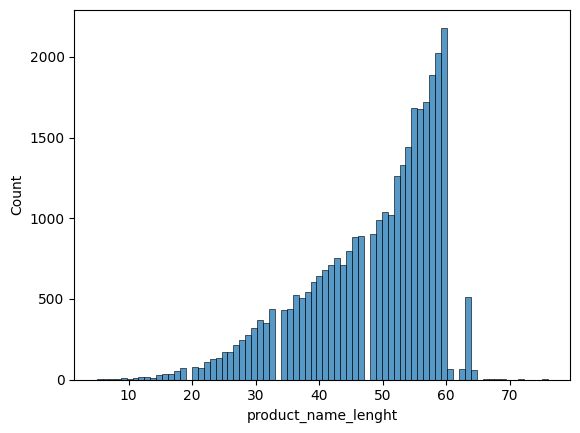

In [89]:
# distribusi kolom product_category_name
sns.histplot(data=products, x="product_name_lenght")

In [90]:
# mencari median kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
median_product_name_lenght = products.product_name_lenght.median()
median_product_description_lenght = products.product_description_lenght.median()
median_product_photos_qty = products.product_photos_qty.median()
median_product_weight_g = products.product_weight_g.median()
median_product_length_cm = products.product_length_cm.median()
median_product_height_cm = products.product_height_cm.median()
median_product_width_cm = products.product_width_cm.median()

# menginput nan dengan median
products.product_name_lenght.fillna(median_product_name_lenght, inplace=True)
products.product_description_lenght.fillna(median_product_description_lenght, inplace=True)
products.product_photos_qty.fillna(median_product_photos_qty, inplace=True)
products.product_weight_g.fillna(median_product_weight_g, inplace=True)
products.product_length_cm.fillna(median_product_length_cm, inplace=True)
products.product_height_cm.fillna(median_product_height_cm, inplace=True)
products.product_width_cm.fillna(median_product_width_cm, inplace=True)

In [91]:
# cek jumlah missing values
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### 7.4 Cek dan mengatasi data duplikat

In [92]:
# cek jika terdapat data duplikat
products[products.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### 7.5 Cek dan mengatasi data yang inkonsisten

In [93]:
# cek data unik pada property type
products.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       '

In [94]:
# mengakses data product_category_name
k_unique = pd.read_sql("SELECT product_category_name, COUNT(product_category_name) as jumlah FROM olist_products_dataset GROUP BY product_category_name;", conn)
k_unique

,product_category_name,jumlah
0,None,0
1,agro_industria_e_comercio,74
2,alimentos,82
3,alimentos_bebidas,104
4,artes,55
...,...,...
69,sinalizacao_e_seguranca,93
70,tablets_impressao_imagem,9
71,telefonia,1134
72,telefonia_fixa,116


In [95]:
# menyeragamkan kategori yang mengandung private room
products.product_category_name = products.product_category_name.apply(lambda x: 'casa_conforto' if 'casa_conforto_2' in x else x)
products.product_category_name = products.product_category_name.apply(lambda x: 'eletrodomesticos' if 'eletrodomesticos_2' in x else x)

# cek data unik pada property type
products.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       '

## 8. Sellers Table

### 8.1 Menghapus kolom index

In [97]:
# mengahapus kolom index
sellers = sellers.drop(["index"], axis=1)
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### 8.2 Cek dan ubah tipe data kolom

In [98]:
# info dataset
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [99]:
# mengubah tipe data pada kolom seller_zip_code_prefix
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype("object")
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


### 8.3 Cek dan mengatasi missing values

In [100]:
# mendapatkan jumlah missing value tiap kolom dan mengurutkan dari yang terbesar ke terkecil
nan_col = sellers.isna().sum().sort_values(ascending = False)
nan_col

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### 8.4 Cek dan mengatasi data duplikat

In [101]:
# cek jika terdapat data duplikat
sellers[sellers.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


### 8.5 Cek dan mengatasi data yang inkonsisten

In [102]:
# cek data unik pada property type
sellers.seller_city.unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

In [104]:
# menyeragamkan kategori yang mengandung private room
sellers.seller_city = sellers.seller_city.apply(lambda x: 'rio de janeiro' if 'rio de janeiro' in x else x)

# cek data unik pada property type
sellers.seller_city.unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

In [105]:
# cek data unik pada property type
sellers.seller_state.unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

# Analisis

## 1. 10 Kategori produk dengan penjualan tertinggi dan terendah

In [228]:
# menggabungkan tabel order items dengan order
penjualan_produk = order_items.merge(order, how='inner', on='order_id')
penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [229]:
# menggabungkan tabel penjualan produk dengan produk
penjualan_produk = penjualan_produk.merge(products, how='inner', on='product_id')
penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,2017-07-13 20:39:29,2017-07-26,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,2018-06-04 18:34:26,2018-06-07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,2017-08-09 21:26:33,2017-08-25,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,2017-08-24 20:04:21,2017-09-01,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,2017-09-11 20:57:51,2017-09-22,brinquedos,32.0,542.0,3.0,150.0,16.0,9.0,14.0
94663,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,2018-01-08 22:37:58,2018-01-30,alimentos_bebidas,52.0,1412.0,1.0,1850.0,20.0,20.0,20.0
94664,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,2017-04-05 18:48:06,2017-04-05,casa_construcao,52.0,1132.0,2.0,350.0,18.0,15.0,16.0
94665,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,2018-08-21 12:18:57,2018-08-23,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0


In [230]:
# menggabungkan tabel penjualan produk dengan category name
penjualan_produk = penjualan_produk.merge(category_name_translation, how='left', on='product_category_name')
penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,brinquedos,32.0,542.0,3.0,150.0,16.0,9.0,14.0,14.0,toys
94663,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,alimentos_bebidas,52.0,1412.0,1.0,1850.0,20.0,20.0,20.0,10.0,food_drink
94664,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,casa_construcao,52.0,1132.0,2.0,350.0,18.0,15.0,16.0,40.0,home_construction
94665,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,4.0,furniture_decor


In [231]:
# memfilter pemesanan dimana order statusnya telah "delivered"
penjualan_produk = penjualan_produk[(penjualan_produk["order_status"] == "delivered")]
penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,brinquedos,32.0,542.0,3.0,150.0,16.0,9.0,14.0,14.0,toys
94663,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,alimentos_bebidas,52.0,1412.0,1.0,1850.0,20.0,20.0,20.0,10.0,food_drink
94664,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,casa_construcao,52.0,1132.0,2.0,350.0,18.0,15.0,16.0,40.0,home_construction
94665,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,4.0,furniture_decor


In [232]:
# mengambil kolom product_category_name_english dan price
penjualan_produk = penjualan_produk[["product_category_name_english", "price"]]
penjualan_produk

,product_category_name_english,price
0,cool_stuff,58.90
1,cool_stuff,55.90
2,cool_stuff,64.90
3,cool_stuff,58.90
4,cool_stuff,58.90
...,...,...
94662,toys,19.00
94663,food_drink,35.99
94664,home_construction,146.90
94665,furniture_decor,99.00


In [233]:
# mengelompokkan data sesuai dengan kategorinya dan menghitung total penjualan per produk
penjualan_produk = penjualan_produk.groupby(["product_category_name_english"], as_index=False).sum()
penjualan_produk

,product_category_name_english,price
0,agro_industry_and_commerce,6459.62
1,air_conditioning,24391.00
2,art,15646.94
3,arts_and_craftmanship,1286.52
4,audio,25411.24
...,...,...
64,stationery,174910.97
65,tablets_printing_image,6539.42
66,telephony,185759.98
67,toys,290030.84


In [234]:
# mengganti nama kolom menjadi kategori dan total penjualan
penjualan_produk = penjualan_produk.rename(columns={"product_category_name_english": "kategori", "price": "total_penjualan"})
penjualan_produk

,kategori,total_penjualan
0,agro_industry_and_commerce,6459.62
1,air_conditioning,24391.00
2,art,15646.94
3,arts_and_craftmanship,1286.52
4,audio,25411.24
...,...,...
64,stationery,174910.97
65,tablets_printing_image,6539.42
66,telephony,185759.98
67,toys,290030.84


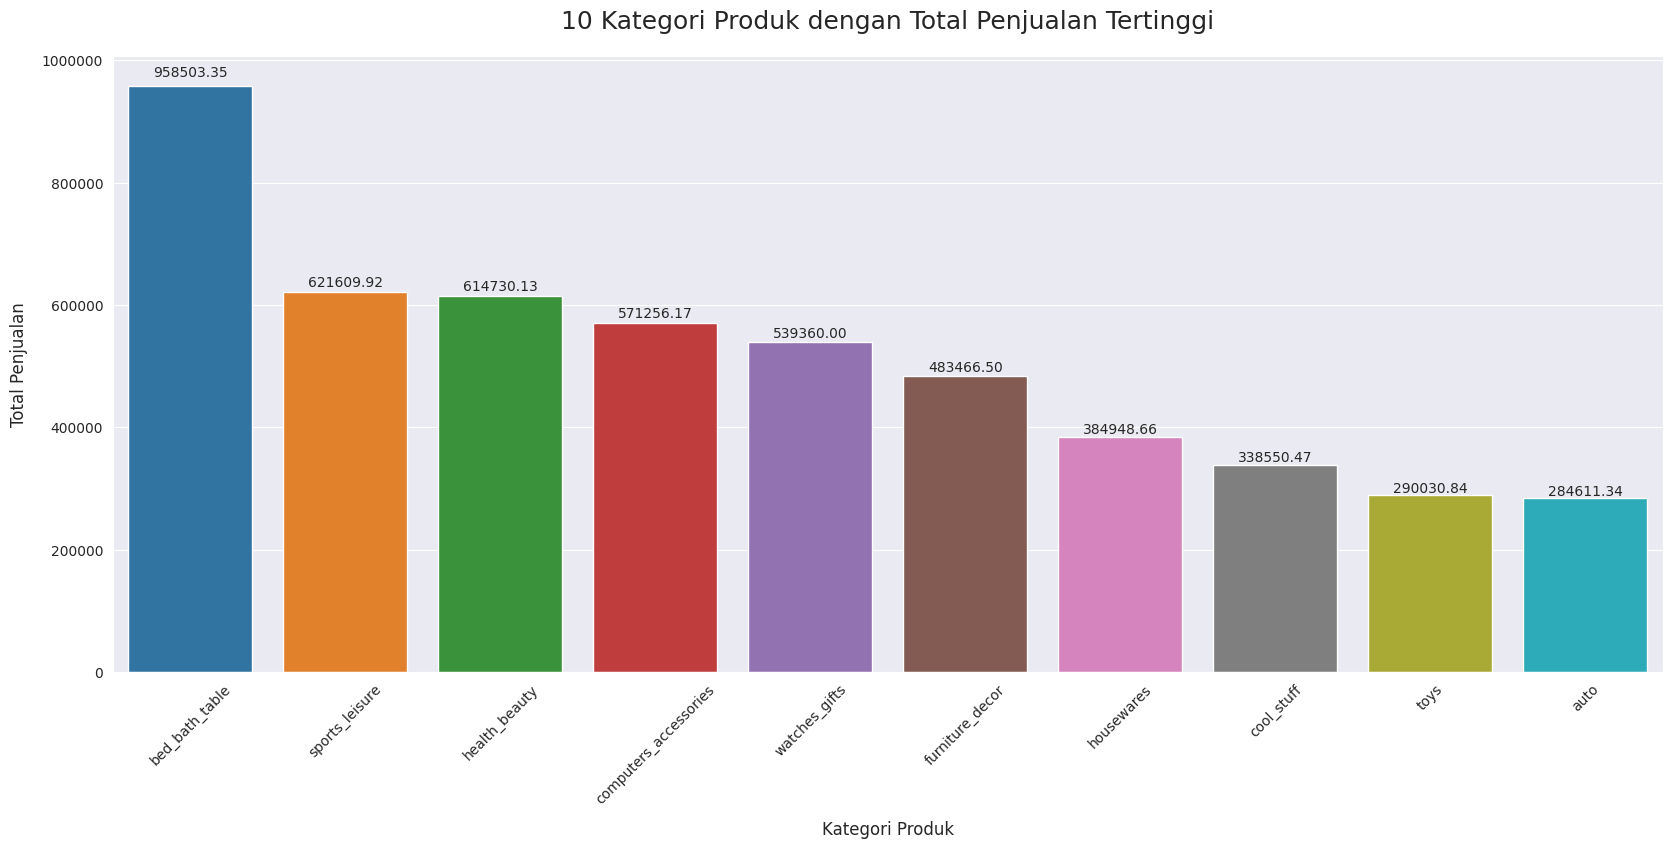

In [312]:
# melakukan visualisasi dengan data yang telah diproses
# mengurutkan data dari total penjualan terbesar dan memasukkannya ke dalam variabel data
data = penjualan_produk.sort_values(by='total_penjualan', ascending=False).head(10)

# customer ukuran figure
fig, ax = plt.subplots(figsize=(20, 8))

# membuat plot
sns.barplot(data = data,
            x="kategori",
            y="total_penjualan",
            ax=ax)

# menambahkan judul
ax.set_title("10 Kategori Produk dengan Total Penjualan Tertinggi", fontsize=18, pad=20)

# menambahkan label
ax.set_xlabel("Kategori Produk", fontsize=12, labelpad=10)
ax.set_ylabel("Total Penjualan", fontsize=12, labelpad=10)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
for i, v in enumerate(data['total_penjualan']):
   ax.text(i, v/0.985, f'{v:.2f}', ha='center')

plt.show()

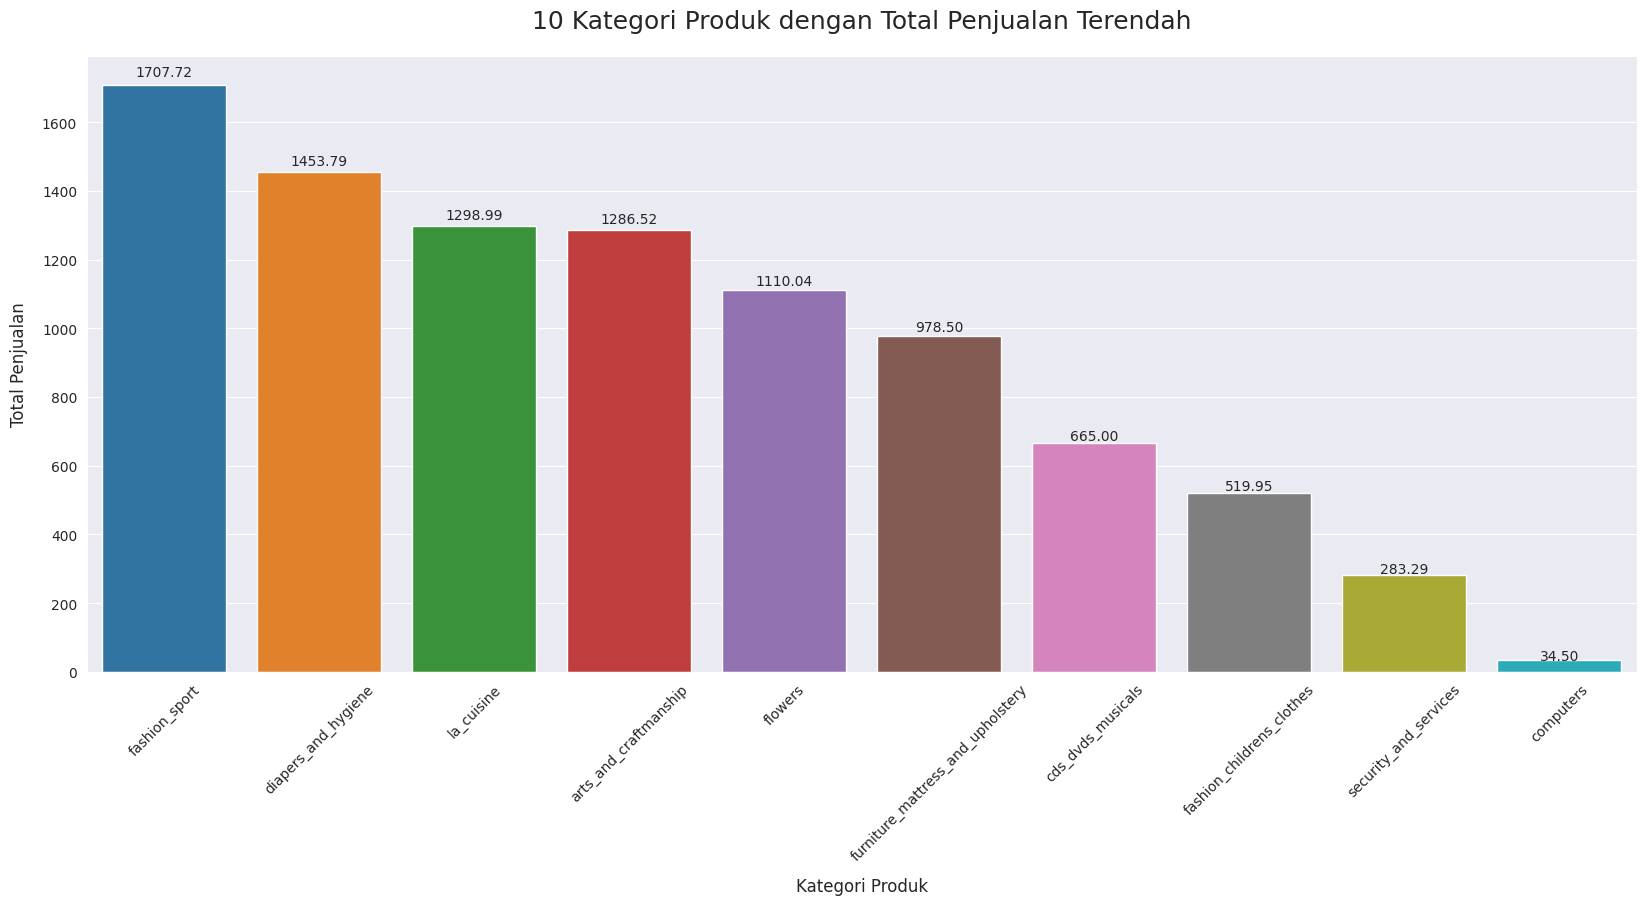

In [311]:
# melakukan visualisasi dengan data yang telah diproses
# mengurutkan data dari total penjualan terkecil dan memasukkannya ke dalam variabel data
data = penjualan_produk.sort_values(by='total_penjualan', ascending=False).tail(10)

# customer ukuran figure
fig, ax = plt.subplots(figsize=(20, 8))

# membuat plot
sns.barplot(data = data,
            x="kategori",
            y="total_penjualan",
            ax=ax)

# menambahkan judul
ax.set_title("10 Kategori Produk dengan Total Penjualan Terendah", fontsize=18, pad=20)

# menambahkan label
ax.set_xlabel("Kategori Produk", fontsize=12, labelpad=10)
ax.set_ylabel("Total Penjualan", fontsize=12, labelpad=10)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
for i, v in enumerate(data['total_penjualan']):
   ax.text(i, v/0.985, f'{v:.2f}', ha='center')

plt.show()

## 2. Metode pembayaran yang paling banyak digunakan

In [304]:
# mengambiil kolom order_id dan payment_type dari tabel order_payments
metode_pembayaran = order_payments[["order_id", "payment_type"]]
metode_pembayaran

,order_id,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
3,ba78997921bbcdc1373bb41e913ab953,credit_card
4,42fdf880ba16b47b59251dd489d4441a,credit_card
...,...,...
103879,c45067032fd84f4cf408730ff5205568,credit_card
103880,7159096c5aa9be77f7f0c26c01ee9793,credit_card
103882,7b905861d7c825891d6347454ea7863f,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card


In [305]:
# mengelompokkan data sesuai dengan kategori pembayaran dan menghitung jumlah pemesanan
metode_pembayaran = metode_pembayaran.groupby(['payment_type'], as_index=False).count()
metode_pembayaran

,payment_type,order_id
0,boleto,18504
1,credit_card,70269
2,debit_card,1444
3,not_defined,3
4,voucher,5685


In [306]:
# mengganti nama kolom menjadi tipe pambayaran dan jumlah
metode_pembayaran = metode_pembayaran.rename(columns={"payment_type": "tipe_pembayaran", "order_id": "jumlah"})
metode_pembayaran

,tipe_pembayaran,jumlah
0,boleto,18504
1,credit_card,70269
2,debit_card,1444
3,not_defined,3
4,voucher,5685


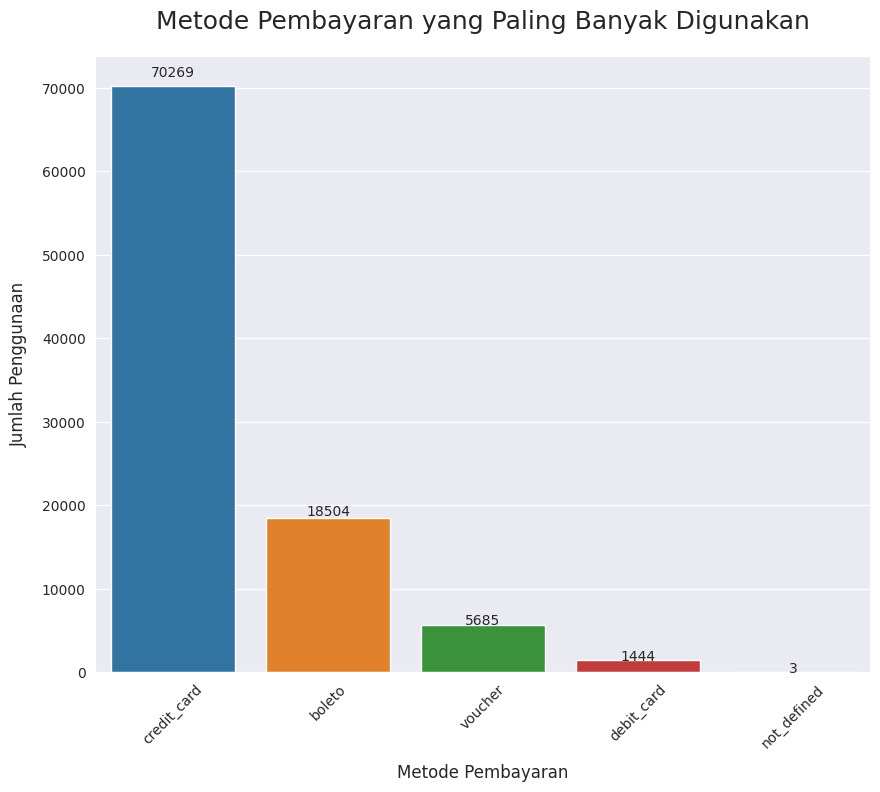

In [310]:
# melakukan visualisasi dengan data yang telah diproses
# mengurutkan data dari jumlah terbesar dan memasukkannya ke dalam variabel data
data = metode_pembayaran.sort_values(by='jumlah', ascending=False)

# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data = data,
            x="tipe_pembayaran",
            y="jumlah",
            ax=ax)

# menambahkan judul
ax.set_title("Metode Pembayaran yang Paling Banyak Digunakan", fontsize=18, pad=20)

# menambahkan label
ax.set_xlabel("Metode Pembayaran", fontsize=12, labelpad=10)
ax.set_ylabel("Jumlah Penggunaan", fontsize=12, labelpad=10)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
for i, v in enumerate(data['jumlah']):
   ax.text(i, v/0.985, f'{v:.0f}', ha='center')

plt.show()

## 3. Perbandingan 10 jumlah penjualan kategori produk tertinggi dengan ratingnya

In [313]:
# menggabungkan tabel order_items dengan order
tabel_penjualan_produk = order_items.merge(order, how='inner', on='order_id')
tabel_penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [314]:
# menggabungkan tabel penjualan produk dengan produk
tabel_penjualan_produk = tabel_penjualan_produk.merge(products, how='inner', on='product_id')
tabel_penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,2017-07-13 20:39:29,2017-07-26,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,2018-06-04 18:34:26,2018-06-07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,2017-08-09 21:26:33,2017-08-25,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,2017-08-24 20:04:21,2017-09-01,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,2017-09-11 20:57:51,2017-09-22,brinquedos,32.0,542.0,3.0,150.0,16.0,9.0,14.0
94663,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,2018-01-08 22:37:58,2018-01-30,alimentos_bebidas,52.0,1412.0,1.0,1850.0,20.0,20.0,20.0
94664,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,2017-04-05 18:48:06,2017-04-05,casa_construcao,52.0,1132.0,2.0,350.0,18.0,15.0,16.0
94665,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,2018-08-21 12:18:57,2018-08-23,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0


In [315]:
# menggabungkan tabel penjualan produk dengan order_reviews
tabel_penjualan_produk = tabel_penjualan_produk.merge(order_reviews, how='inner', on='order_id')
tabel_penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,not_exist,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,not_exist,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5,not_exist,not_exist,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5,not_exist,not_exist,2017-08-25,2017-08-28 00:51:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94470,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,150.0,16.0,9.0,14.0,52103af7ab77ef377854cc1b7e6aeead,4,not_exist,not_exist,2017-09-12,2017-09-13 01:50:29
94471,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,1850.0,20.0,20.0,20.0,54eab8672c589c5056dd719a72375f1b,5,not_exist,not_exist,2018-01-09,2018-01-10 15:06:46
94472,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,350.0,18.0,15.0,16.0,35c38f254835f157b51a1770b91cb205,1,not_exist,"Produto, chegou corretamente, porém houve uma ...",2017-04-06,2017-04-10 13:32:15
94473,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,2300.0,37.0,30.0,20.0,4e78f83fed69a70a3eb2796a9f24b368,4,not_exist,not_exist,2018-08-22,2018-08-25 14:22:54


In [316]:
# menggabungkan tabel penjualan produk dengan category name translation
tabel_penjualan_produk = tabel_penjualan_produk.merge(category_name_translation, how='left', on='product_category_name')
tabel_penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,not_exist,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,22.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,not_exist,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07,22.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12,22.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5,not_exist,not_exist,2017-08-10,2017-08-13 03:35:17,22.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,9.0,14.0,426f43a82185969503fb3c86241a9535,5,not_exist,not_exist,2017-08-25,2017-08-28 00:51:18,22.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94470,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,9.0,14.0,52103af7ab77ef377854cc1b7e6aeead,4,not_exist,not_exist,2017-09-12,2017-09-13 01:50:29,14.0,toys
94471,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,20.0,20.0,54eab8672c589c5056dd719a72375f1b,5,not_exist,not_exist,2018-01-09,2018-01-10 15:06:46,10.0,food_drink
94472,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,15.0,16.0,35c38f254835f157b51a1770b91cb205,1,not_exist,"Produto, chegou corretamente, porém houve uma ...",2017-04-06,2017-04-10 13:32:15,40.0,home_construction
94473,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,30.0,20.0,4e78f83fed69a70a3eb2796a9f24b368,4,not_exist,not_exist,2018-08-22,2018-08-25 14:22:54,4.0,furniture_decor


In [317]:
# memfilter pemesanan dimana order statusnya telah "delivered"
tabel_penjualan_produk = tabel_penjualan_produk[(tabel_penjualan_produk["order_status"] == "delivered")]
tabel_penjualan_produk

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,not_exist,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,22.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,not_exist,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07,22.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12,22.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5,not_exist,not_exist,2017-08-10,2017-08-13 03:35:17,22.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,9.0,14.0,426f43a82185969503fb3c86241a9535,5,not_exist,not_exist,2017-08-25,2017-08-28 00:51:18,22.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94470,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,08013618897a5ba0b56ecd80981470da,delivered,2017-08-31 21:15:02,...,9.0,14.0,52103af7ab77ef377854cc1b7e6aeead,4,not_exist,not_exist,2017-09-12,2017-09-13 01:50:29,14.0,toys
94471,ffe63ac8de50ca1b8d8aba30d6bff4fb,1,fda6a1e500285956c972ec2fe10f4923,751bdc4d83a466c7206cd42e8f426b03,2018-01-08 14:31:54,35.99,16.60,71b497960cffaf0689ae433028997745,delivered,2018-01-02 13:57:36,...,20.0,20.0,54eab8672c589c5056dd719a72375f1b,5,not_exist,not_exist,2018-01-09,2018-01-10 15:06:46,10.0,food_drink
94472,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.90,15.20,e85ff8cc3cc2c09bdb9204dd7930c0fb,delivered,2017-03-15 17:16:36,...,15.0,16.0,35c38f254835f157b51a1770b91cb205,1,not_exist,"Produto, chegou corretamente, porém houve uma ...",2017-04-06,2017-04-10 13:32:15,40.0,home_construction
94473,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,...,30.0,20.0,4e78f83fed69a70a3eb2796a9f24b368,4,not_exist,not_exist,2018-08-22,2018-08-25 14:22:54,4.0,furniture_decor


In [318]:
# mengambil kolom product_category_name_english dan order_id dari tabel penjualan produk
jumlah_penjualan_produk = tabel_penjualan_produk[["product_category_name_english", "order_id"]]
jumlah_penjualan_produk

,product_category_name_english,order_id
0,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214
1,cool_stuff,130898c0987d1801452a8ed92a670612
2,cool_stuff,532ed5e14e24ae1f0d735b91524b98b9
3,cool_stuff,6f8c31653edb8c83e1a739408b5ff750
4,cool_stuff,7d19f4ef4d04461989632411b7e588b9
...,...,...
94470,toys,ffe4b41e99d39f0b837a239110260530
94471,food_drink,ffe63ac8de50ca1b8d8aba30d6bff4fb
94472,home_construction,ffea406a848c8afe4dec22bf6290ba00
94473,furniture_decor,ffee31fb4b5e35c9123608015637c495


In [320]:
# mengelompokkan data sesuai dengan kategorinya dan menghitung jumlah pemesanan
jumlah_penjualan_produk = jumlah_penjualan_produk.groupby(['product_category_name_english'], as_index=False).count()
jumlah_penjualan_produk

,product_category_name_english,order_id
0,agro_industry_and_commerce,94
1,air_conditioning,208
2,art,179
3,arts_and_craftmanship,22
4,audio,303
...,...,...
64,stationery,2201
65,tablets_printing_image,80
66,telephony,4022
67,toys,3448


In [321]:
# mengambil kolom product_category_name_english dan review score dari tabel penjualan produk
rating_penjualan_produk = tabel_penjualan_produk[["product_category_name_english", "review_score"]]
rating_penjualan_produk

,product_category_name_english,review_score
0,cool_stuff,5
1,cool_stuff,5
2,cool_stuff,4
3,cool_stuff,5
4,cool_stuff,5
...,...,...
94470,toys,4
94471,food_drink,5
94472,home_construction,1
94473,furniture_decor,4


In [322]:
# mengelompokkan data sesuai dengan kategorinya dan menghitung rata-rata rating yang didapatkan
rating_penjualan_produk = rating_penjualan_produk.groupby(['product_category_name_english'], as_index=False).mean()
rating_penjualan_produk

,product_category_name_english,review_score
0,agro_industry_and_commerce,4.308511
1,air_conditioning,4.110577
2,art,4.083799
3,arts_and_craftmanship,4.045455
4,audio,3.818482
...,...,...
64,stationery,4.252612
65,tablets_printing_image,4.137500
66,telephony,3.998757
67,toys,4.198956


In [323]:
# menggabungkan tabel jumlah_penjualan_produk dengan rating_penjualan_produk
perbandingan_jumlah_rating = jumlah_penjualan_produk.merge(rating_penjualan_produk, how='inner', on='product_category_name_english')
perbandingan_jumlah_rating

,product_category_name_english,order_id,review_score
0,agro_industry_and_commerce,94,4.308511
1,air_conditioning,208,4.110577
2,art,179,4.083799
3,arts_and_craftmanship,22,4.045455
4,audio,303,3.818482
...,...,...,...
64,stationery,2201,4.252612
65,tablets_printing_image,80,4.137500
66,telephony,4022,3.998757
67,toys,3448,4.198956


In [324]:
# mengganti nama kolom menjadi kategori produk, jumlah, dan rating
perbandingan_jumlah_rating = perbandingan_jumlah_rating.rename(columns={"product_category_name_english": "kategori_produk", "order_id": "jumlah", "review_score": "rating"})
perbandingan_jumlah_rating

,kategori_produk,jumlah,rating
0,agro_industry_and_commerce,94,4.308511
1,air_conditioning,208,4.110577
2,art,179,4.083799
3,arts_and_craftmanship,22,4.045455
4,audio,303,3.818482
...,...,...,...
64,stationery,2201,4.252612
65,tablets_printing_image,80,4.137500
66,telephony,4022,3.998757
67,toys,3448,4.198956


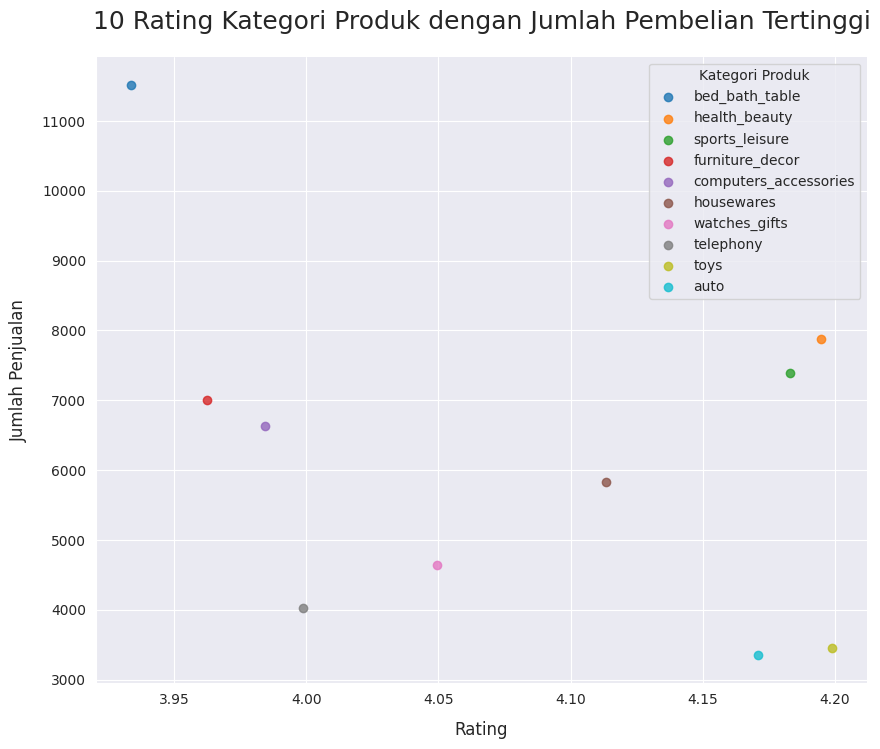

In [355]:
# melakukan visualisasi dengan data yang telah diproses
# mengurutkan data dari jumlah penjualan terbesar dan memasukkannya ke dalam variabel data
data = perbandingan_jumlah_rating.sort_values(by='jumlah', ascending=False).head(10)

# membuat plot
sns.lmplot(x="rating",
           y="jumlah",
           data=data,
           fit_reg=False,
           hue='kategori_produk',
           legend=False,
           height=7,
           aspect=1.25)

# menambahkan judul
plt.title("10 Rating Kategori Produk dengan Jumlah Pembelian Tertinggi", fontsize=18, pad=20)

# menambahkan label
plt.xlabel("Rating", fontsize=12, labelpad=10)
plt.ylabel("Jumlah Penjualan", fontsize=12, labelpad=10)

# menambahkan legenda
plt.legend(title='Kategori Produk')

plt.show()

## 4. Kota dengan pembelian terbanyak

In [356]:
# menggabungkan tabel order_items dengan order
kota_pemesanan = order_items.merge(order, how='inner', on='order_id')
kota_pemesanan

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [357]:
# menggabungkan tabel kota_pemesanan dengan customers
kota_pemesanan = kota_pemesanan.merge(customers, how='inner', on='customer_id')
kota_pemesanan

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27,6b42acb204802253acec6607ff3a9e0b,28540,cordeiro,RJ
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,39401,montes claros,MG
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [358]:
# memfilter pemesanan dimana order statusnya telah "delivered"
kota_pemesanan = kota_pemesanan[(kota_pemesanan["order_status"] == "delivered")]
kota_pemesanan

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27,6b42acb204802253acec6607ff3a9e0b,28540,cordeiro,RJ
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,ecc3d4eb9b17d2f0865d21f2abecc51c,39401,montes claros,MG
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [359]:
# mengambil kolom customer_city dan order_id
jumlah_kota_pemesanan = kota_pemesanan[["customer_city", "order_id"]]
jumlah_kota_pemesanan

,customer_city,order_id
0,campos dos goytacazes,00010242fe8c5a6d1ba2dd792cb16214
1,santa fe do sul,00018f77f2f0320c557190d7a144bdd3
2,para de minas,000229ec398224ef6ca0657da4fc703e
3,atibaia,00024acbcdf0a6daa1e931b038114c75
4,varzea paulista,00042b26cf59d7ce69dfabb4e55b4fd9
...,...,...
94662,cordeiro,fffb2ef8874127f75b52b643880fd7e0
94663,montes claros,fffbee3b5462987e66fb49b1c5411df2
94664,sao paulo,fffce4705a9662cd70adb13d4a31832d
94665,vinhedo,fffe18544ffabc95dfada21779c9644f


In [360]:
# mengelompokkan data sesuai dengan customer city dan menghitung jumlah pemesanannya
jumlah_kota_pemesanan = jumlah_kota_pemesanan.groupby(['customer_city'], as_index=False).count()
jumlah_kota_pemesanan

,customer_city,order_id
0,abadia dos dourados,3
1,abaete,11
2,abaetetuba,1
3,abaira,2
4,abare,2
...,...,...
3500,xinguara,5
3501,xique-xique,3
3502,zacarias,2
3503,ze doca,1


In [361]:
# # mengambil kolom customer_city dan price
total_kota_pemesanan = kota_pemesanan[["customer_city", "price"]]
total_kota_pemesanan

,customer_city,price
0,campos dos goytacazes,58.90
1,santa fe do sul,239.90
2,para de minas,199.00
3,atibaia,12.99
4,varzea paulista,199.90
...,...,...
94662,cordeiro,17.90
94663,montes claros,119.85
94664,sao paulo,99.90
94665,vinhedo,55.99


In [362]:
# mengelompokkan data sesuai dengan customer city dan menghitung total pembelian
total_kota_pemesanan = total_kota_pemesanan.groupby(['customer_city'], as_index=False).sum()
total_kota_pemesanan

,customer_city,price
0,abadia dos dourados,358.90
1,abaete,1283.81
2,abaetetuba,255.61
3,abaira,157.99
4,abare,185.19
...,...,...
3500,xinguara,512.32
3501,xique-xique,179.79
3502,zacarias,198.80
3503,ze doca,39.90


In [363]:
# menggabungkan tabel jumlah_kota_pemesanan dengan total_kota_pemesanan
kota_pemesanan = jumlah_kota_pemesanan.merge(total_kota_pemesanan, how='inner', on='customer_city')
kota_pemesanan

,customer_city,order_id,price
0,abadia dos dourados,3,358.90
1,abaete,11,1283.81
2,abaetetuba,1,255.61
3,abaira,2,157.99
4,abare,2,185.19
...,...,...,...
3500,xinguara,5,512.32
3501,xique-xique,3,179.79
3502,zacarias,2,198.80
3503,ze doca,1,39.90


In [364]:
# mengganti nama kolom menjadi kota, jumlah dan total
kota_pemesanan = kota_pemesanan.rename(columns={"customer_city": "kota", "order_id": "jumlah", "price": "total"})
kota_pemesanan

,kota,jumlah,total
0,abadia dos dourados,3,358.90
1,abaete,11,1283.81
2,abaetetuba,1,255.61
3,abaira,2,157.99
4,abare,2,185.19
...,...,...,...
3500,xinguara,5,512.32
3501,xique-xique,3,179.79
3502,zacarias,2,198.80
3503,ze doca,1,39.90


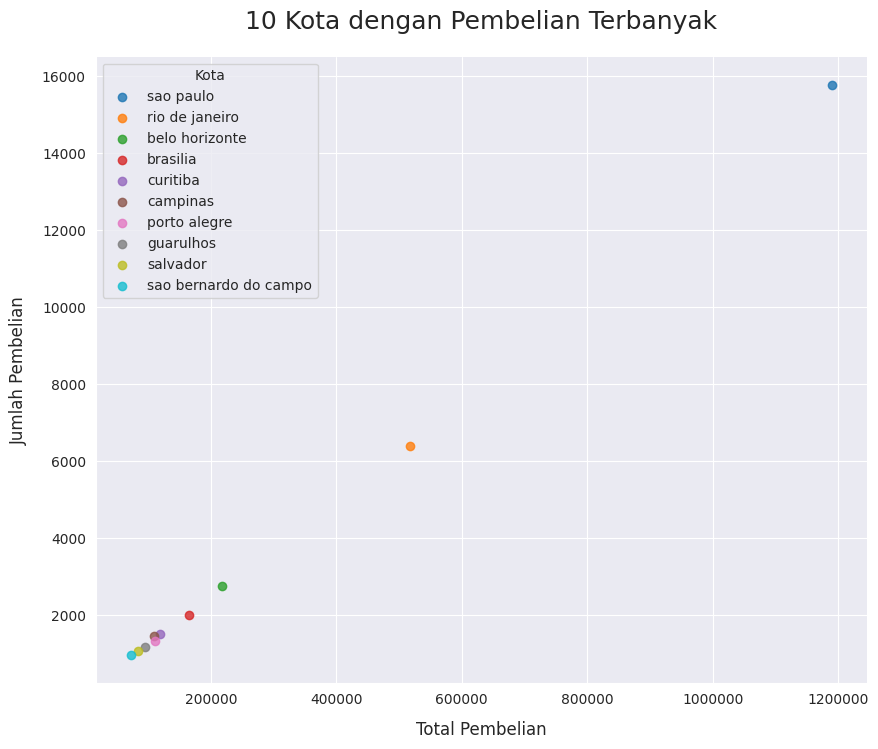

In [366]:
# melakukan visualisasi dengan data yang telah diproses
# mengurutkan data dari jumlah penjualan terbesar dan memasukkannya ke dalam variabel data
data = kota_pemesanan.sort_values(by='jumlah', ascending=False).head(10)

# membuat plot
sns.lmplot(x="total",
           y="jumlah",
           data=data,
           fit_reg=False,
           hue='kota',
           legend=False,
           height=7,
           aspect=1.25)

# menambahkan judul
plt.title("10 Kota dengan Pembelian Terbanyak", fontsize=18, pad=20)

# menambahkan label
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Total Pembelian", fontsize=12, labelpad=10)
plt.ylabel("Jumlah Pembelian", fontsize=12, labelpad=10)

# menambahkan legenda
plt.legend(title='Kota')

plt.show()

## 5. Tren total penjualan bulanan

In [386]:
# menggabungkan tabel order_items dengan order
tren_penjualan = order_items.merge(order, how='inner', on='order_id')
tren_penjualan

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [387]:
# memfilter pemesanan dimana order statusnya telah "delivered"
tren_penjualan = tren_penjualan[(tren_penjualan["order_status"] == "delivered")]
tren_penjualan

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94662,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27
94663,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23
94664,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
94665,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [388]:
# mengambil kolim order_purchase_timestamp dan order_id
tren_penjualan = tren_penjualan[["order_purchase_timestamp", "order_id"]]
tren_penjualan

,order_purchase_timestamp,order_id
0,2017-09-13 08:59:02,00010242fe8c5a6d1ba2dd792cb16214
1,2017-04-26 10:53:06,00018f77f2f0320c557190d7a144bdd3
2,2018-01-14 14:33:31,000229ec398224ef6ca0657da4fc703e
3,2018-08-08 10:00:35,00024acbcdf0a6daa1e931b038114c75
4,2017-02-04 13:57:51,00042b26cf59d7ce69dfabb4e55b4fd9
...,...,...
94662,2018-03-30 15:36:49,fffb2ef8874127f75b52b643880fd7e0
94663,2018-06-19 09:27:48,fffbee3b5462987e66fb49b1c5411df2
94664,2017-10-23 17:07:56,fffce4705a9662cd70adb13d4a31832d
94665,2017-08-14 23:02:59,fffe18544ffabc95dfada21779c9644f


In [389]:
# # mengelompokkan data sesuai dengan bulan tanggal pembelian dan menghitung jumlah pemesanannya
tren_penjualan = tren_penjualan.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).count().reset_index()
tren_penjualan

,order_purchase_timestamp,order_id
0,2016-09-30,3
1,2016-10-31,270
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,789
5,2017-02-28,1599
6,2017-03-31,2511
7,2017-04-30,2183
8,2017-05-31,3416
9,2017-06-30,2953


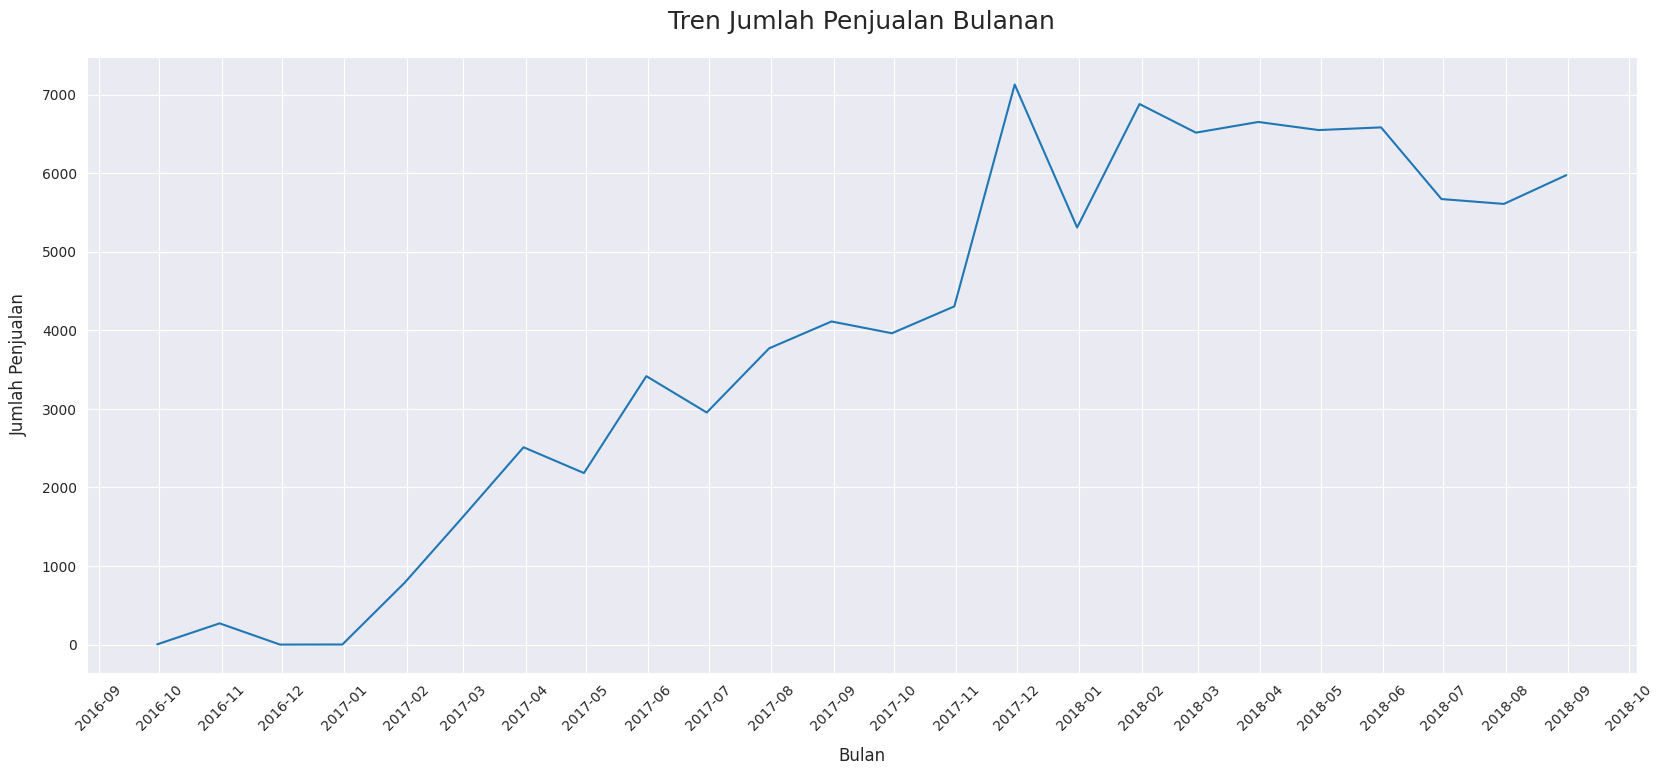

In [399]:
# melakukan visualisasi dengan data yang telah diproses
data = tren_penjualan

# customer ukuran figure
fig, ax = plt.subplots(figsize=(20, 8))

# membuat plot
sns.lineplot(data=data,
             x="order_purchase_timestamp",
             y="order_id",
             ax=ax)

# menambahkan judul
ax.set_title("Tren Jumlah Penjualan Bulanan", fontsize=18, pad=20)

# menambahkan label
ax.set_xlabel("Bulan", fontsize=12, labelpad=10)
ax.set_ylabel("Jumlah Penjualan", fontsize=12, labelpad=10)
month = mdates.MonthLocator()
format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(month)
ax.xaxis.set_major_formatter(format)
ax.xaxis.set_tick_params(rotation=45)

plt.show()